In [1]:
#importing some necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Reading the data 
df = pd.read_csv('BreadBasket_DMS.csv')
df.sample(5)

,Date,Time,Transaction,Item
15242,23-02-2017,09:07:58,7034,Coffee
17351,11-03-2017,09:18:17,7924,Bread
4097,24-11-2016,09:24:35,1941,Bread
20118,01-04-2017,09:33:35,9166,Coffee
2424,12-11-2016,12:45:16,1153,Brownie


In [4]:
df.shape

(21293, 4)

In [8]:
#checking if there are any NaN values in any column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [9]:
df.isnull().any()

Date           False
Time           False
Transaction    False
Item           False
dtype: bool

In [17]:
'''
In the "Item" column, 
there are entries labeled "NONE." 
Since the meaning of these entries is unclear, 
we will remove these purchases from the dataset.'''
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [16]:
#fetching out the columns where item is NONE
df.loc[(df['Item'] == 'NONE')].head()

,Date,Time,Transaction,Item
26,30-10-2016,10:27:21,11,NONE
38,30-10-2016,10:34:36,15,NONE
39,30-10-2016,10:34:36,15,NONE
66,30-10-2016,11:05:30,29,NONE
80,30-10-2016,11:37:10,37,NONE


In [13]:
#storing the indexes in a variable temp where item is NONE
temp = df.loc[(df['Item'] == 'NONE')].index
temp

Int64Index([   26,    38,    39,    66,    80,    85,   126,   140,   149,
              167,
            ...
            20919, 20964, 21010, 21077, 21080, 21108, 21122, 21254, 21255,
            21266],
           dtype='int64', length=786)

In [19]:
#dropping out the columns where item is NONE
df.drop(temp,axis = 0,inplace = True)
df.shape

(20507, 4)

In [21]:
#again checking whether our data is okay to move forward
df.isnull().any()

Date           False
Time           False
Transaction    False
Item           False
dtype: bool

In [22]:
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB


In [24]:
#everything looks fine and our data cleaning process completed here
#now we will move to feature engineering 

In [31]:
#To analyze on which day sales are happening more,
#we will add a column for the 
#day name in our dataset using the existing "Date" column
df['Date'] = pd.to_datetime(df['Date'])
df['WeekDay'] = df['Date'].dt.day_name()
df.head()


,Date,Time,Transaction,Item,Day,WeekDay
0,2016-10-30,09:58:11,1,Bread,Sunday,Sunday
1,2016-10-30,10:05:34,2,Scandinavian,Sunday,Sunday
2,2016-10-30,10:05:34,2,Scandinavian,Sunday,Sunday
3,2016-10-30,10:07:57,3,Hot chocolate,Sunday,Sunday
4,2016-10-30,10:07:57,3,Jam,Sunday,Sunday


In [34]:
#Spliting date column into it's respective year, month and day
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.sample(5)
#after splitting we will drop Date column 
df.drop('Date',axis = 1,inplace = True)
df.sample(5)


,Time,Transaction,Item,Day,WeekDay,year,month,day
12458,17:19:08,5889,Tea,Thursday,Thursday,2017,3,2
12901,14:36:04,6071,Sandwich,Tuesday,Tuesday,2017,5,2
6246,10:55:19,2985,Medialuna,Saturday,Saturday,2016,11,12
16476,11:45:34,7548,Coffee,Monday,Monday,2017,4,3
16271,09:50:34,7461,Tiffin,Friday,Friday,2017,3,3


In [35]:
#this data contains transactions of two years
df.year.unique()

array([2016, 2017], dtype=int64)

In [37]:
#further we will calculate season based on
#month to analyze sales in given season
df['month'] = df['month'].astype(int)
df.loc[(df['month'] >=1) & (df['month'] <= 2),'season'] = 'winter'
df.loc[(df['month'] >2) & (df['month'] <=3),'season'] = 'spring'
df.loc[(df['month'] >3) & (df['month'] <= 5),'season'] = 'summer'
df.loc[(df['month'] >5) & (df['month'] <= 9),'season'] = 'monsoon'
df.loc[(df['month'] >9) & (df['month'] <= 12),'season'] = 'pre-winter'
df.sample(5)

,Time,Transaction,Item,Day,WeekDay,year,month,day,season
4886,10:19:12,2320,Medialuna,Wednesday,Wednesday,2016,11,30,pre-winter
20047,13:47:22,9135,Coffee,Friday,Friday,2017,3,31,spring
15169,13:12:36,7008,Bread,Wednesday,Wednesday,2017,2,22,winter
2692,15:12:01,1264,Keeping It Local,Sunday,Sunday,2016,11,13,pre-winter
9599,09:03:20,4593,Tea,Friday,Friday,2017,1,13,winter


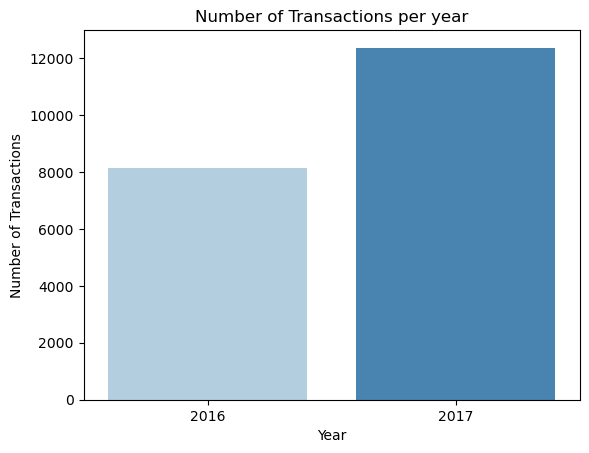

In [41]:
#let's compare the trasactions
yearly_transactions =df['year'].value_counts().reset_index()
yearly_transactions.columns = ['year','transaction_count']
sns.barplot(x = 'year',y = 'transaction_count',data = yearly_transactions,palette = 'Blues')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.title("Number of Transactions per year")
plt.show()

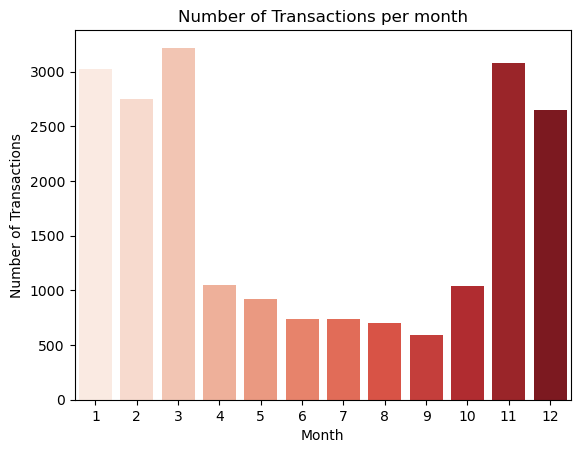

In [81]:
#similarly let's quickly analyze month vs transaction graph
monthly_transactions =df['month'].value_counts().reset_index()
monthly_transactions.columns = ['month','transaction_count']
sns.barplot(x = 'month',y = 'transaction_count',data =monthly_transactions,palette = 'Reds')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title("Number of Transactions per month")
plt.show()

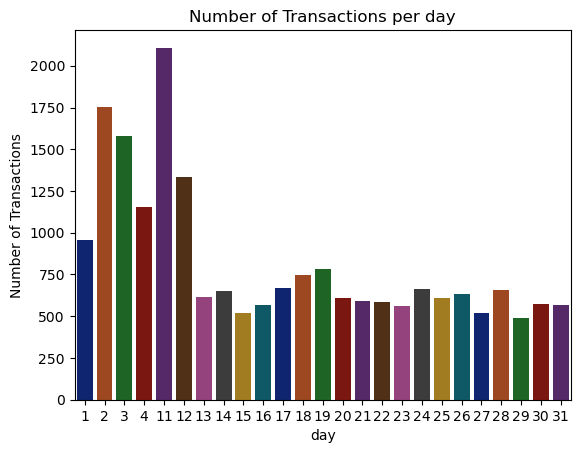

In [83]:
#similarly let's quickly analyze day vs transaction graph
day_transactions =df['day'].value_counts().reset_index()
day_transactions.columns = ['day','transaction_count']
sns.barplot(x = 'day',y = 'transaction_count',data = day_transactions,palette = 'dark')
plt.xlabel('day')
plt.ylabel('Number of Transactions')
plt.title("Number of Transactions per day")
plt.show()


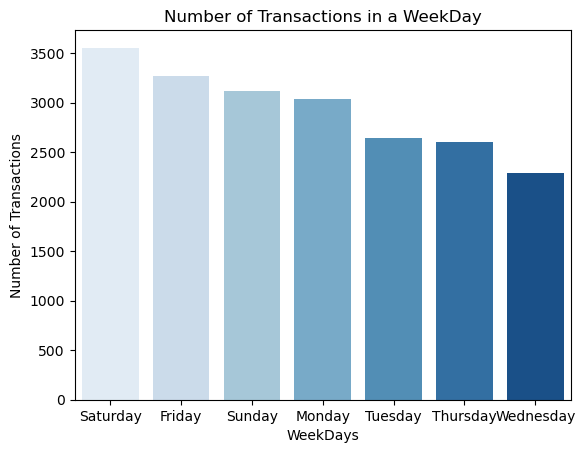

In [55]:
#similarly let's quickly analyze weekdays vs transaction graph
weekdays_transactions =df['WeekDay'].value_counts().reset_index()
weekdays_transactions.columns = ['WeekDay','transaction_count']
sns.barplot(x = 'WeekDay',y = 'transaction_count',data = weekdays_transactions,palette = 'Blues')
plt.xlabel('WeekDays')
plt.ylabel('Number of Transactions')
plt.title("Number of Transactions in a WeekDay")
plt.show()
#we can see that no of transactions is maximum on Saturday!

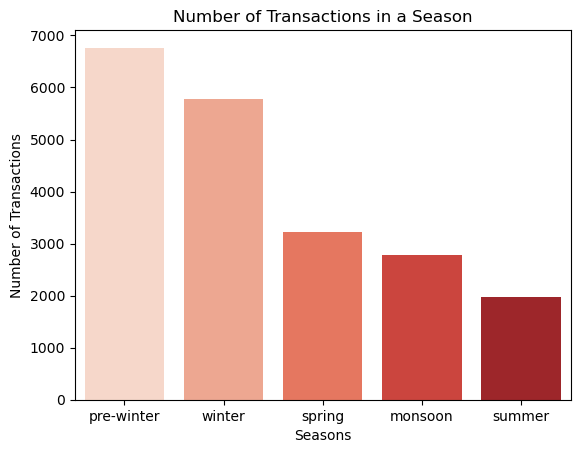

In [56]:
#similarly let's quickly analyze seasons vs transaction graph
seasons_transactions =df['season'].value_counts().reset_index()
seasons_transactions.columns = ['Seasons','transaction_count']
sns.barplot(x = 'Seasons',y = 'transaction_count',data = seasons_transactions,palette = 'Reds')
plt.xlabel('Seasons')
plt.ylabel('Number of Transactions')
plt.title("Number of Transactions in a Season")
plt.show()
#we can see that no of transactions is maximum in pre-winter season! 

In [63]:
top_pre_winter = df.Item.loc[(df['season']== "pre-winter")].value_counts()[:10] / sum(df.Item.loc[(df['season']== "pre-winter")].value_counts()) *100
top_winter = df.Item.loc[(df['season']== "winter")].value_counts()[:10] / sum(df.Item.loc[(df['season']== "winter")].value_counts()) *100
top_spring = df.Item.loc[(df['season']== "spring")].value_counts()[:10] / sum(df.Item.loc[(df['season']== "spring")].value_counts()) *100
top_monsoon = df.Item.loc[(df['season']== "monsoon")].value_counts()[:10] / sum(df.Item.loc[(df['season']== "monsoon")].value_counts()) *100
top_summer = df.Item.loc[(df['season']== "summer")].value_counts()[:10] / sum(df.Item.loc[(df['season']== "summer")].value_counts()) *100

In [66]:
top_sales = pd.DataFrame([top_pre_winter,top_winter,top_spring,top_monsoon,top_summer],index = ["Pre-Winter",'winter','spring','monsoon','summer']).transpose()
top_sales

,Pre-Winter,winter,spring,monsoon,summer
Coffee,27.069781,25.662338,27.111801,26.801153,27.434077
Bread,17.681845,16.000000,14.937888,16.066282,14.097363
Tea,7.081609,7.601732,6.118012,7.348703,5.882353
Pastry,4.065642,4.086580,4.503106,4.322767,4.056795
Medialuna,4.065642,2.580087,NaN,2.809798,2.839757
Cake,4.036073,6.129870,5.652174,4.358790,4.817444
Hot chocolate,3.267297,2.943723,2.329193,NaN,3.296146
Sandwich,3.015967,4.034632,4.813665,3.998559,3.448276
Muffin,2.261975,NaN,NaN,NaN,NaN
Cookies,2.217623,2.978355,3.229814,2.161383,2.738337


In [65]:
worst_pre_winter = df.Item.loc[(df['season']== "pre-winter")].value_counts()[-10:] / sum(df.Item.loc[(df['season']== "pre-winter")].value_counts()) *100
worst_winter = df.Item.loc[(df['season']== "winter")].value_counts()[-10:] / sum(df.Item.loc[(df['season']== "winter")].value_counts()) *100
worst_spring = df.Item.loc[(df['season']== "spring")].value_counts()[-10:] / sum(df.Item.loc[(df['season']== "spring")].value_counts()) *100
worst_monsoon = df.Item.loc[(df['season']== "monsoon")].value_counts()[-10:] / sum(df.Item.loc[(df['season']== "monsoon")].value_counts()) *100
worst_summer = df.Item.loc[(df['season']== "summer")].value_counts()[-10:] / sum(df.Item.loc[(df['season']== "summer")].value_counts()) *100

In [67]:
worst_sales = pd.DataFrame([worst_pre_winter,worst_winter,worst_spring,worst_monsoon,worst_summer],index = ["Pre-Winter",'winter','spring','monsoon','summer']).transpose()
worst_sales

,Pre-Winter,winter,spring,monsoon,summer
Argentina Night,0.014784,0.017316,0.031056,NaN,NaN
Bowl Nic Pitt,0.014784,NaN,NaN,0.036023,NaN
Brioche and salami,0.014784,0.017316,NaN,0.036023,NaN
Polenta,0.014784,NaN,NaN,NaN,NaN
Olum & polenta,0.014784,NaN,NaN,NaN,NaN
Spread,0.014784,0.017316,NaN,NaN,NaN
Bacon,0.014784,NaN,NaN,NaN,NaN
Fairy Doors,0.014784,NaN,NaN,NaN,0.05071
Chicken sand,0.014784,NaN,NaN,NaN,NaN
Half slice Monster,0.014784,NaN,NaN,0.036023,NaN


In [77]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules,fpgrowth

In [78]:
seasons = {season: df[df["season"] == season] for season in ["pre-winter","winter","monsoon","spring","summer"]}
overall = df

# Encoding function
def encode_units(x):
    return 1 if x >= 1 else 0

# Apriori function
def apriori_analysis(data):
    # Group, pivot, and encode data
    encoding = data.groupby(['Transaction', 'Item'])['Item'].count().unstack().fillna(0).applymap(encode_units)
    # Find frequent itemsets
    frequent_itemsets = apriori(encoding, min_support=0.01, use_colnames=True)
    # Generate and sort association rules by confidence
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    return rules.sort_values(by='confidence', ascending=False)

# Example usage for the overall dataset
output = apriori_analysis(overall)
output.head(5)

C:\Users\ANURAG KUMAR\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574


In [84]:
seasons = {season: df[df["season"] == season] for season in ["pre-winter", "winter", "monsoon", "spring", "summer"]}
overall = df

# Encoding function
def encode_units(x):
    return 1 if x >= 1 else 0

# FP-Growth function
def fp_growth_analysis(data):
    # Group, pivot, and encode data
    encoding = data.groupby(['Transaction', 'Item'])['Item'].count().unstack().fillna(0).applymap(encode_units)
    # Find frequent itemsets using FP-growth
    frequent_itemsets = fpgrowth(encoding, min_support=0.01, use_colnames=True)
    # Generate and sort association rules by confidence
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    return rules.sort_values(by='confidence', ascending=False)

# Example usage for the overall dataset
output = fp_growth_analysis(overall)
output.sample(5)

C:\Users\ANURAG KUMAR\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
20,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
25,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779,0.540090
31,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321
41,(Coffee),(Spanish Brunch),0.478394,0.018172,0.010882,0.022747,1.251766,0.002189,1.004682,0.385594
40,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
